In [31]:
import pandas as pd

In [32]:
f = open("박근혜_취임연설문.txt", 'r', encoding='utf8')
lines = f.readlines()
f.close()

## Hannaum 한글 형태소 분석기 사용

In [33]:
from konlpy.tag import Hannanum

## 한글 형태소 분석기 비교

* OKT (Open Korean Text)  
OKT는 Twitter에서 개발되었으며, 후에 OpenKoreanText로 명칭이 변경되었습니다.
이 형태소 분석기는 사용이 간편하고 속도도 빠른 편입니다.
또한, 소셜 미디어 데이터와 같이 비정형적이고 신조어가 많은 텍스트에서 높은 성능을 보여 줍니다.
  
    * 장점
        * 신조어 처리: 최신 신조어나 인터넷 용어에 강합니다.
        * 다양한 기능: 형태소 분석 외에도 품사 태깅, 명사 추출, 어근 변환, 표준화 등 다양한 기능을 제공합니다.
        * 사용자 친화적: API가 사용하기 쉽게 설계되어 있어 쉽게 사용할 수 있습니다.
    * 단점:
        * 공식적인 언어 사용에 비해 소셜 미디어 텍스트에 최적화되어 있어, 정식 문서 분석에는 한계가 있을 수 있습니다.   

* Hannanum  
한나눔은 KAIST에서 개발한 형태소 분석기로, 주로 학술적 또는 공식 문서에서의 사용을 목표로 개발되었습니다.
이 분석기는 보다 정교한 문법적 분석을 제공하며, 전문적인 문서에서 높은 성능을 보여줍니다.

    * 장점
        * 학술적 연구 기반: 언어학적 연구를 바탕으로 개발되어, 전문 문서나 공식적인 텍스트 분석에 적합합니다.
        * 정교한 문법 분석: 복잡한 문법 구조를 좀 더 잘 파악할 수 있습니다.
    * 단점
        * 처리 속도가 OKT에 비해 다소 느릴 수 있습니다.
        * 사용자 인터페이스가 다소 불편하고, 신조어나 비정형 텍스트에 대한 처리 능력이 OKT에 비해 떨어집니다.

In [34]:
hannanum = Hannanum()

temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
temp[:1]

[['존경', '국민여러분']]

In [35]:
# 단어 리스트로 변환
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list=flatten(temp)
word_list[:1]

['존경']

In [36]:
# 두글자 이상인 단어만 추출
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

국민      42
우리      23
여러분     17
시대      16
문화      12
대한민국    12
희망       9
사회       8
행복       8
정부       8
Name: count, dtype: int64

In [37]:
from wordcloud import WordCloud
from collections import Counter

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

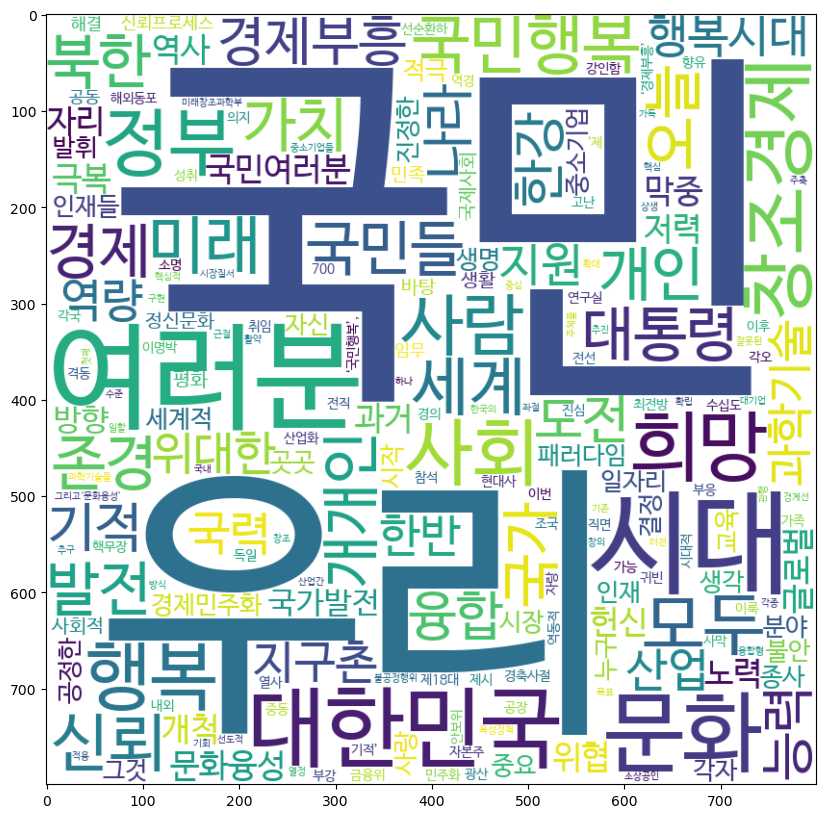

In [38]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

# 이미지 누끼 반영

### 이미지 누끼 따는 방법

* 포토샵 없이 적용
https://toptrend.blog/%EB%88%84%EB%81%BC-%EB%94%B0%EA%B8%B0-%EC%82%AC%EC%9D%B4%ED%8A%B8/
https://m.blog.naver.com/krc15601/221537268981

* 포토샵 적용 
https://blog.adobe.com/ko/publish/2022/02/16/adobe-photoshop-remove-a-background-with-help-from-ai
https://www.youtube.com/watch?v=4Qb0SE9Qwyk
https://www.youtube.com/watch?v=1UdGzNlO2Nw

In [39]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

image_name = 'park3.png'
# image_name = 'Jaewoo.png'


target_image = Image.open(image_name) 

try:
    mask = Image.new("RGB", target_image.size, (255,255,255))
    mask.paste(target_image,target_image)
    mask = np.array(mask)
    print("mask 변환 방식1")
except:
    print(image_name)
    mask=np.array(Image.open(image_name))
    print("mask 변환 방식2")
finally:
    plt.imshow(target_image)


FileNotFoundError: [Errno 2] No such file or directory: 'park3.png'

In [ ]:
count = Counter(word_list)

wc_moon = WordCloud(
    font_path = font_path,
    # mask=moon_mask,
    mask=mask,
    background_color="white"
)

In [ ]:
wc_moon = wc_moon.generate_from_frequencies(count)

plt.figure(figsize=(8,8))
plt.imshow(wc_moon,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# image_colors=ImageColorGenerator(moon_mask)
image_colors=ImageColorGenerator(mask)

plt.figure(figsize=(8,8))
# color_func=image_colors <= 원본 이지미의 컬러톤에 맞추어 컬러맵을 세팅한다.
plt.imshow(wc_moon.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.show()